The script clusters recipes using combination of features groups. First group is  Numerical Features including Carbohydrates, Proteins and Calories. Second group is Health Goals and Dieatary Preferences. The third group is Recipe Category and Recipe Difficulty.  The combination of features was manualy chosen to mimic user interaction. The outcomes include visualizations of the clustering process and a the silhoutte scores. 

/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for Numerical Features: 0.3535


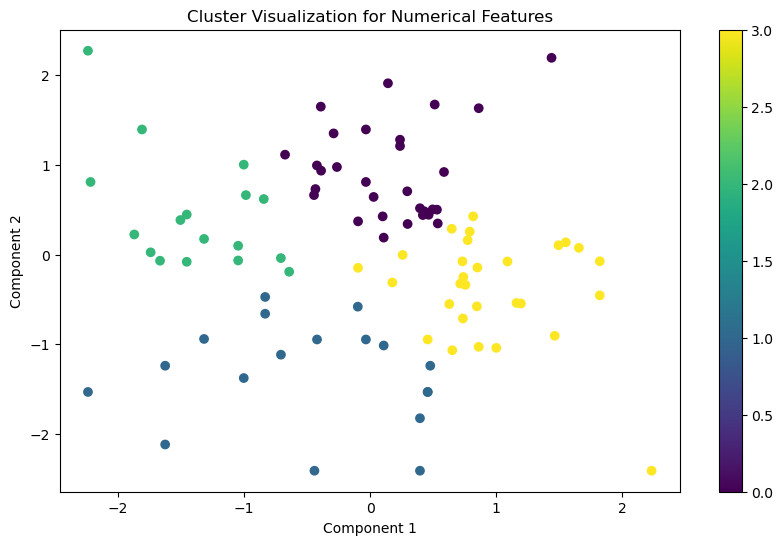

Silhouette Score for 'Health Goals' and 'Dietary Preference': 0.9064


/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


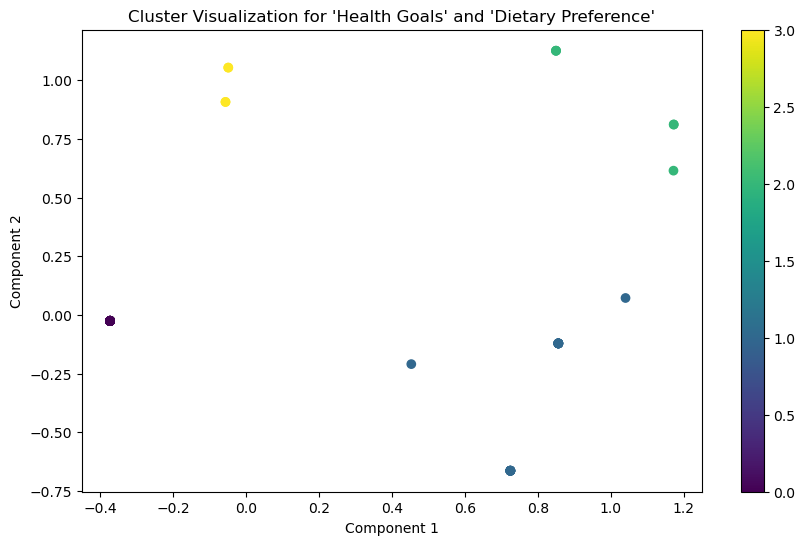

/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 'Recipe Category' and 'Recipe Difficulty': 0.7613


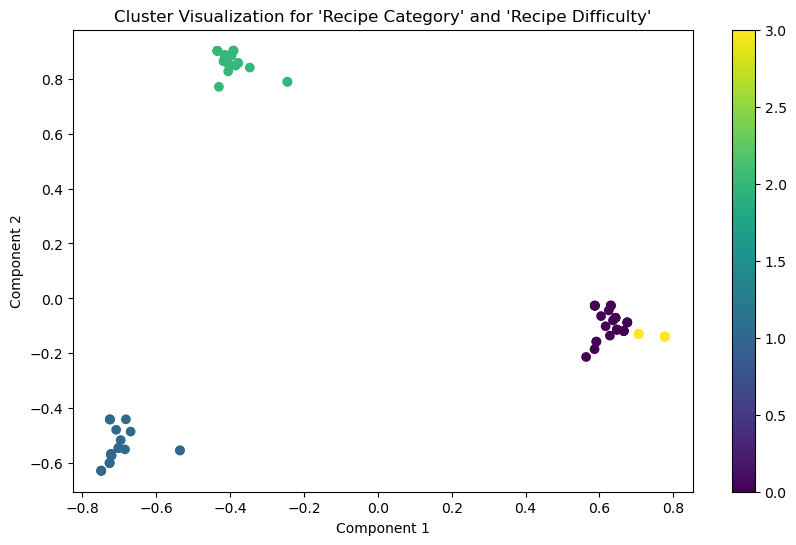

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("updated_cleaned_recipe_dataset.csv")

# Define the feature columns for clustering
numerical_features = ['Calories', 'Carbohydrates', 'Proteins']
categorical_features_1 = ['Health Goals', 'Dietary Preference']
categorical_features_2 = ['Recipe Category', 'Recipe Difficulty']

# Standard Scaler for numerical data and OneHotEncoder for categorical data
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False)

# Set the number of clusters
k = 3

# Function to perform clustering, calculate silhouette score, and create visuals
def perform_clustering(features, data, title, is_categorical=False):
    if is_categorical:
        transformed_features = encoder.fit_transform(data[features])
        # Reduce dimensions to 2D using PCA for visualization purposes
        pca = PCA(n_components=2)
        transformed_features = pca.fit_transform(transformed_features)
    else:
        transformed_features = scaler.fit_transform(data[features])
        # For numerical features, just select the first two for a simple 2D plot
        transformed_features = transformed_features[:, :2]
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(transformed_features)
    
    silhouette_avg = silhouette_score(transformed_features, cluster_labels)
    print(f"Silhouette Score for {title}: {silhouette_avg:.4f}")
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(transformed_features[:, 0], transformed_features[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.title(f'Cluster Visualization for {title}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.show()

# 1. Clustering with Numerical Features
perform_clustering(numerical_features, data, 'Numerical Features')

# 2. Clustering with 'Health Goals' and 'Dietary Preference'
perform_clustering(categorical_features_1, data, "'Health Goals' and 'Dietary Preference'", is_categorical=True)

# 3. Clustering with 'Recipe Category' and 'Recipe Difficulty'
perform_clustering(categorical_features_2, data, "'Recipe Category' and 'Recipe Difficulty'", is_categorical=True)
